# Report

In this project, I worked on the Cleveland heart disease dataset from UC Irvine Machine Learning Repository. The goal was to process the data and get some insights about the 303 patients who underwent clinical and non-invasive test for heart disease diagnosis.

The source publication is International application of a new probability algorithm for the diagnosis of coronary artery disease.
By R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sandhu, K. Guppy, S. Lee, V. Froelicher. 1989
Published in American Journal of Cardiology

## 0. Reading the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from src.load import load_data, describe_data

In [3]:
df=load_data('data/raw_data/processed.cleveland.data')

In [4]:
describe_data(df)

The number of (rows,columns) in this dataset is (303, 14).
 
Information about columns names and types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    float64
 1   sex                      303 non-null    float64
 2   chest_pain               303 non-null    float64
 3   rest_blood_pressure      303 non-null    float64
 4   serum_cholesterol        303 non-null    float64
 5   fasting_blood_sugar      303 non-null    float64
 6   rest_ecg                 303 non-null    float64
 7   max_heart_rate_thal      303 non-null    float64
 8   exercise_angina          303 non-null    float64
 9   st_oldpeak               303 non-null    float64
 10  st_slope                 303 non-null    float64
 11  nb_major_vessels         299 non-null    float64
 12  thallium_stress_test     301 no

In [5]:
# Display the first few rows of the dataset
df.head()

,age,sex,chest_pain,rest_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_thal,exercise_angina,st_oldpeak,st_slope,nb_major_vessels,thallium_stress_test,heart_disease_diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# display 5 random rows
df.sample(5)

,age,sex,chest_pain,rest_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_thal,exercise_angina,st_oldpeak,st_slope,nb_major_vessels,thallium_stress_test,heart_disease_diagnosis
231,55.0,0.0,4.0,180.0,327.0,0.0,1.0,117.0,1.0,3.4,2.0,0.0,3.0,2
90,66.0,1.0,4.0,120.0,302.0,0.0,2.0,151.0,0.0,0.4,2.0,0.0,3.0,0
202,57.0,1.0,3.0,150.0,126.0,1.0,0.0,173.0,0.0,0.2,1.0,1.0,7.0,0
139,51.0,1.0,3.0,125.0,245.0,1.0,2.0,166.0,0.0,2.4,2.0,0.0,3.0,0
62,58.0,1.0,4.0,128.0,216.0,0.0,2.0,131.0,1.0,2.2,2.0,3.0,7.0,1


The data has been loaded, each row represents a patient and there are 14 variables. Here's a summary of the dataset:

| Variable Name     | Role      | Type        | Description                                                                 | Units   | Missing Values |
|-------------------|-----------|-------------|---------------------------------------------------------------------------|---------|----------------|
| age               | Feature   | Float       |                                                                           | years   | no             |
| sex               | Feature   | Float       | 1 = male; 0 = female                                                      |         | no             |
| chest_pain          | Feature   | Float     | 1: typical angina,  2: atypical angina, 3: non-anginal pain, 4: asymptomatic|         | no             |
| rest_blood_pressure | Feature   | Float     |  resting blood pressure (on admission to the hospital)                  | mm Hg   | no             |
| serum_cholesterol   | Feature   | Float     |  serum cholestorol                                                      | mg/dl   | no             |
| fasting_blood_sugar | Feature   | Float     |  1 = true (value> 120 mg/dl); 0 = false                                  | mg/dl   | no             |
| rest_ecg             | Feature   | Float    | 0: normal, 1: ST-T wave abnormality, 2: probable or definite LV hypertrophy|         | no             |
| max_heart_rate_thal  | Feature   | Float    |  maximum heart rate achieved during thallium stress test                   |         | no             |
| exercise_angina      | Feature   | Float    | exercise induced angina, 1 = yes; 0 = no                                  |         | no             |
| st_oldpeak            | Feature   | Float   |  ST depression induced by exercise relative to rest                      |  mm      | no             |
| st_slope              | Feature   | Float   | 1: upsloping,  2: flat, 3: downsloping                                   |         | no             |
| nb_major_vessels      | Feature   | Float   |   number of major vessels (0-3) colored by flourosopy                    |         | yes            |
| thallium_stress_test  | Feature   | Float   | 3 = normal; 6 = fixed defect; 7 = reversible defect                      |         | yes            |
| heart_disease_diagnosis| Target    | Integer |   diagnosis of heart disease  0: absence. 1-4: presence                  |         | no             |

Note that the result of a thallium test stress may show:

-Normal perfusion study – normal blood supply to all areas of the heart muscle

-Reversible perfusion defect – decreased blood flow to an area of heart muscle, due to inadequate blood supply from a particular coronary artery (blood vessel around the heart)

-Fixed perfusion defect – decreased blood flow to an area of heart muscle, due to permanently damaged muscle (essentially a scar in the heart muscle)

## 1. Processing the data 

In [7]:
# Return number of rows and columns
shape_of_data = df.shape
print(f'The number of (rows,columns) in this dataset is {shape_of_data}.')

The number of (rows,columns) in this dataset is (303, 14).


### Which variables does our dataset have and what type?

In [8]:
# Return infos about the columns names and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    float64
 1   sex                      303 non-null    float64
 2   chest_pain               303 non-null    float64
 3   rest_blood_pressure      303 non-null    float64
 4   serum_cholesterol        303 non-null    float64
 5   fasting_blood_sugar      303 non-null    float64
 6   rest_ecg                 303 non-null    float64
 7   max_heart_rate_thal      303 non-null    float64
 8   exercise_angina          303 non-null    float64
 9   st_oldpeak               303 non-null    float64
 10  st_slope                 303 non-null    float64
 11  nb_major_vessels         299 non-null    float64
 12  thallium_stress_test     301 non-null    float64
 13  heart_disease_diagnosis  303 non-null    int64  
dtypes: float64(13), int64(1)
m

The dataset info shows that it contains numerical values, float or integer. However, from the description of the dataset, variables could be classified as categorical, boolean and numerical variables.

### Renaming category names for categorical variables and assigning correct type

In [9]:
from src.process import process_categorical_columns, process_boolean_columns

In [10]:
process_categorical_columns(df)

,age,sex,chest_pain,rest_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_thal,exercise_angina,st_oldpeak,st_slope,nb_major_vessels,thallium_stress_test,heart_disease_diagnosis
0,63.0,male,typical angina,145.0,233.0,1.0,probable or definite LV hypertrophy,150.0,0.0,2.3,downsloping,0.0,fixed defect,0
1,67.0,male,asymptomatic,160.0,286.0,0.0,probable or definite LV hypertrophy,108.0,1.0,1.5,flat,3.0,normal,2
2,67.0,male,asymptomatic,120.0,229.0,0.0,probable or definite LV hypertrophy,129.0,1.0,2.6,flat,2.0,reversible defect,1
3,37.0,male,non-anginal pain,130.0,250.0,0.0,normal,187.0,0.0,3.5,downsloping,0.0,normal,0
4,41.0,female,atypical angina,130.0,204.0,0.0,probable or definite LV hypertrophy,172.0,0.0,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,male,typical angina,110.0,264.0,0.0,normal,132.0,0.0,1.2,flat,0.0,reversible defect,1
299,68.0,male,asymptomatic,144.0,193.0,1.0,normal,141.0,0.0,3.4,flat,2.0,reversible defect,2
300,57.0,male,asymptomatic,130.0,131.0,0.0,normal,115.0,1.0,1.2,flat,1.0,reversible defect,3
301,57.0,female,atypical angina,130.0,236.0,0.0,probable or definite LV hypertrophy,174.0,0.0,0.0,flat,1.0,normal,1


The categories names of the categorical variables have been changed to make it more understandable. This will help for readability and understanding the data visualization later because the assignment of a number to the categories is difficult to understand, for example for 'thallium_stress_test', we have 3, 6 and 7 coding for 3 : 'normal', 6 : 'fixed defect', 7 : 'reversable defect'. For readibility and understanding purposes, for the variable 'sex' that can be considered as boolean were changed to 0: female, 1:male.

The correct data type for each variable has been replaced.


### Changing variables to boolean type

For the diagnosis, we have 0 which means absence of heart disease and 1,2,3 and 4 representing presence of heart disease. To simplify, we will changethe values from 1 to 4 to 1.

In [11]:
process_boolean_columns(df)

,age,sex,chest_pain,rest_blood_pressure,serum_cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_thal,exercise_angina,st_oldpeak,st_slope,nb_major_vessels,thallium_stress_test,heart_disease_diagnosis
0,63.0,male,typical angina,145.0,233.0,True,probable or definite LV hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,False
1,67.0,male,asymptomatic,160.0,286.0,False,probable or definite LV hypertrophy,108.0,True,1.5,flat,3.0,normal,True
2,67.0,male,asymptomatic,120.0,229.0,False,probable or definite LV hypertrophy,129.0,True,2.6,flat,2.0,reversible defect,True
3,37.0,male,non-anginal pain,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,False
4,41.0,female,atypical angina,130.0,204.0,False,probable or definite LV hypertrophy,172.0,False,1.4,upsloping,0.0,normal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,male,typical angina,110.0,264.0,False,normal,132.0,False,1.2,flat,0.0,reversible defect,True
299,68.0,male,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversible defect,True
300,57.0,male,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversible defect,True
301,57.0,female,atypical angina,130.0,236.0,False,probable or definite LV hypertrophy,174.0,False,0.0,flat,1.0,normal,True


The variables 'fasting_blood_sugar', 'exercise_angina', 'heart_disease_diagnosis', have been changed to boolean True or False.


In [12]:
# Finally let's check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      303 non-null    float64 
 1   sex                      303 non-null    category
 2   chest_pain               303 non-null    category
 3   rest_blood_pressure      303 non-null    float64 
 4   serum_cholesterol        303 non-null    float64 
 5   fasting_blood_sugar      303 non-null    bool    
 6   rest_ecg                 303 non-null    category
 7   max_heart_rate_thal      303 non-null    float64 
 8   exercise_angina          303 non-null    bool    
 9   st_oldpeak               303 non-null    float64 
 10  st_slope                 303 non-null    category
 11  nb_major_vessels         299 non-null    float64 
 12  thallium_stress_test     301 non-null    category
 13  heart_disease_diagnosis  303 non-null    bool    
dtypes: bool(3)

### Quick statistics summary of the numerical variables

In [13]:
# Look at the summary statistics of the dataset for numerical values
df.describe()

,age,rest_blood_pressure,serum_cholesterol,max_heart_rate_thal,st_oldpeak,nb_major_vessels
count,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.672241
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.937438
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


## 2. Data cleaning

### Are there duplicate entries?

In [14]:
df.duplicated().sum()

0

There are no duplicate entries.

### Are there missing values?

In [15]:
df.isna().sum()

age                        0
sex                        0
chest_pain                 0
rest_blood_pressure        0
serum_cholesterol          0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_thal        0
exercise_angina            0
st_oldpeak                 0
st_slope                   0
nb_major_vessels           4
thallium_stress_test       2
heart_disease_diagnosis    0
dtype: int64

4 values are missing in the column 'nb_major_vessels' and 2 values are missing in the column 'thallium_stress_test'.



In [16]:
from src.clean import clean_all
from src.clean import impute_nan

In [17]:
df = impute_nan(df)

In [18]:
# Checking that there are no missing values and that columns kept the right type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      303 non-null    float64 
 1   rest_blood_pressure      303 non-null    float64 
 2   serum_cholesterol        303 non-null    float64 
 3   max_heart_rate_thal      303 non-null    float64 
 4   st_oldpeak               303 non-null    float64 
 5   nb_major_vessels         303 non-null    float64 
 6   sex                      303 non-null    category
 7   chest_pain               303 non-null    category
 8   rest_ecg                 303 non-null    category
 9   st_slope                 303 non-null    category
 10  thallium_stress_test     303 non-null    category
 11  fasting_blood_sugar      303 non-null    bool    
 12  exercise_angina          303 non-null    bool    
 13  heart_disease_diagnosis  303 non-null    bool    
dtypes: bool(3)

## 3. Handling outliers

/!\ Removing outliers requires thorough investigation of the data first, it depends on the goals of the project and should be treated case by case. For this reason, in this report, I show how to use the outlier_report function with an example threshold of 3, but do not use the function to remove any data.


In [19]:
from src.outlier import outlier_report

In [20]:
# Example of outlier report with a z-score threshold of 3
outlier_report(df, 3)


Data points with outliers in column rest_blood_pressure

      age  rest_blood_pressure  serum_cholesterol  max_heart_rate_thal  \
126  56.0                200.0              288.0                133.0   
188  54.0                192.0              283.0                195.0   

     st_oldpeak  nb_major_vessels  
126         4.0               2.0  
188         0.0               1.0  

Values of outliers: [200. 192.]

Index values of outliers as a list: [126, 188]
---------------------------------------------------------------------------

Data points with outliers in column serum_cholesterol

      age  rest_blood_pressure  serum_cholesterol  max_heart_rate_thal  \
48   65.0                140.0              417.0                157.0   
121  63.0                150.0              407.0                154.0   
152  67.0                115.0              564.0                160.0   
181  56.0                134.0              409.0                150.0   

     st_oldpeak  nb_major_v

In [21]:
# from src.outlier import handle_outliers
# handle_outliers(df, 3)
# Outliers have to be investigated case by case before deciding to remove data

## 4. Plotting: Data exploration and visualization

In [22]:
from src.plotting import make_count_plots
from src.plotting import hist_plot_numericals
from src.plotting import plot_pie_chart
from src.plotting import contingency_table
from src.plotting import look_for_correlations


### Is the dataset balanced between heart disease and healthy group?

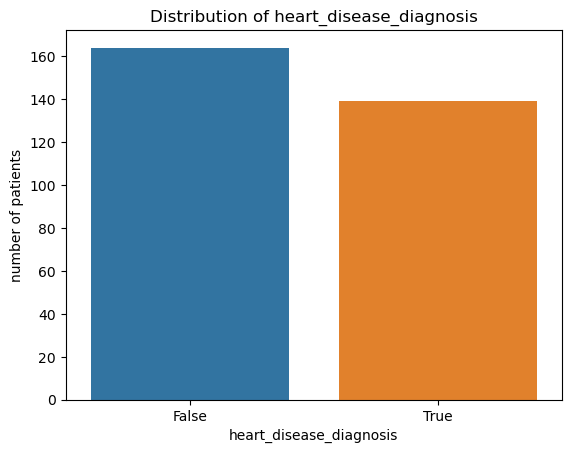

In [23]:
from src.plotting import make_count_plots

make_count_plots(df, 'heart_disease_diagnosis')

The dataset seems to be balanced, with similar numbers of patients with heart disease (True in orange) and without heart disease (False in blue).

### What's the distribution of male/female in the whole dataset?

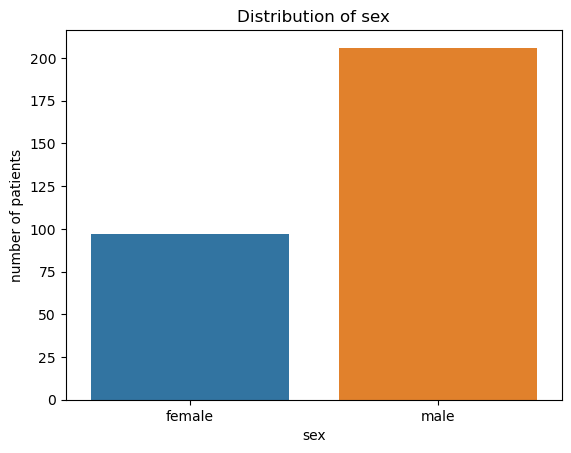

In [24]:
from src.plotting import make_count_plots

make_count_plots(df, 'sex', hue='sex')


The dataset contains more males than females. Around 2/3 of the dataset is male. 

### What's the relationship between the gender and 'heart_disease_diagnosis'?

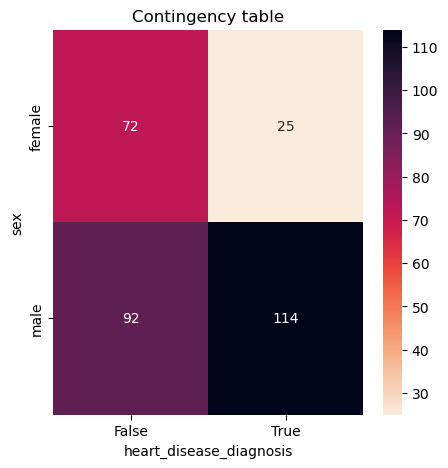

In [25]:
contingency_table(df, 'sex')

In [26]:
"""
Module for chi2 statistics
"""

import pandas as pd
from scipy.stats import chi2_contingency


def chi_square_stats(data, column):
    """
    Calculates the Chi2, p-value,
    degre of freedom and expected
    frequencies

    Args:
        data (dataframe): name of the dataframe
        column (string): column name
    """
    # create contingency table
    data_crosstab = pd.crosstab(
        index=[data[column]], columns=data["heart_disease_diagnosis"]
    )

    # chi2 test
    chi2_stats, pvalue, dof, expected_freq = chi2_contingency(data_crosstab)

    # print values
    print("Chi2 statistics: ", chi2_stats)
    print("p-value: ", pvalue)
    print("Degree of freedom: ", dof)
    print("Expected frequencies: ", expected_freq)

In [27]:
chi_square_stats(df, 'sex')

Chi2 statistics:  22.042560606155472
p-value:  2.666712348180942e-06
Degree of freedom:  1
Expected frequencies:  [[ 52.50165017  44.49834983]
 [111.49834983  94.50165017]]


Here we can see that most patients with heart disease are males. The p-value of the Chi2 is significant. indicating that the two variables are not independent. 

### What about fasting blood sugar?

Fasting blood sugar refers to the amount of glucose during fasting. It is an interesting factor to investigate. In this case the doctors recorded it True, if the value is over 120mg/dl and False if it is below.

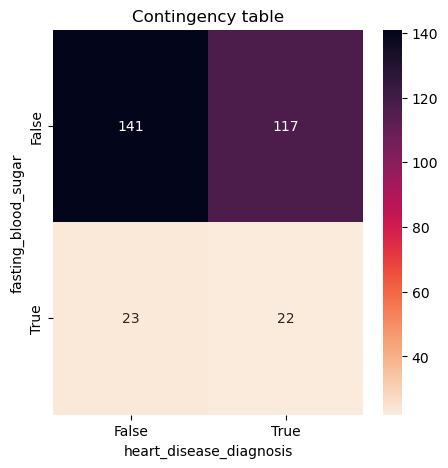

In [28]:
contingency_table(df, 'fasting_blood_sugar')

In [29]:
chi_square_stats(df, 'fasting_blood_sugar')

Chi2 statistics:  0.07709504829488663
p-value:  0.7812734067063785
Degree of freedom:  1
Expected frequencies:  [[139.64356436 118.35643564]
 [ 24.35643564  20.64356436]]


There is no relation between fasting blood sugar and heart disease diagnosis. This is surprising because, nowadays, there is a known link between diabetes and heart disease. However, because we don't have exact values, it is impossible to know if the patients had diabetes (>126mg/dl). 

### What's the distribution of the numerical features between healthy and heart disease group ?

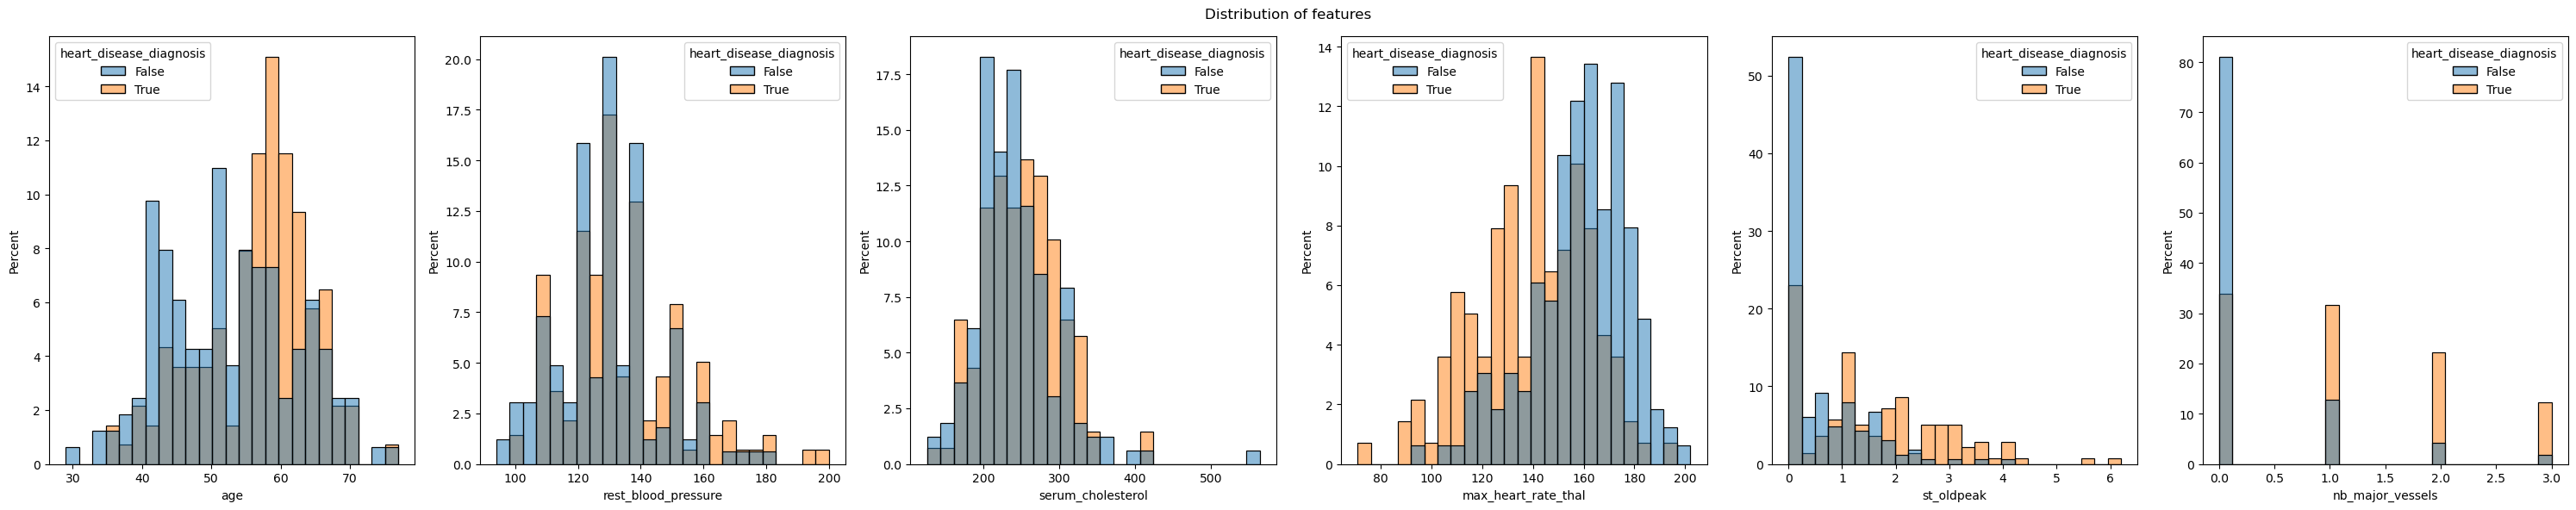

In [30]:
from src.plotting import hist_plot_numericals

hist_plot_numericals(df)

For visual comparison purposes, the histograms were generated using a normalizing parameter (stat = "percent").  

There are more patients with heart disease in the age randing from 55 to 65 years old. Moreover, patients from the heart disease group show lower values of maximum heart rate during the thallium stress test compared to the healthy group. Patients with heart disease seem to have a higher number of major vessels visible by fluoroscopy compared to the healthy group, indicating more

### Are there correlations betwen the features? Which numerical features correlate the most with heart disease?

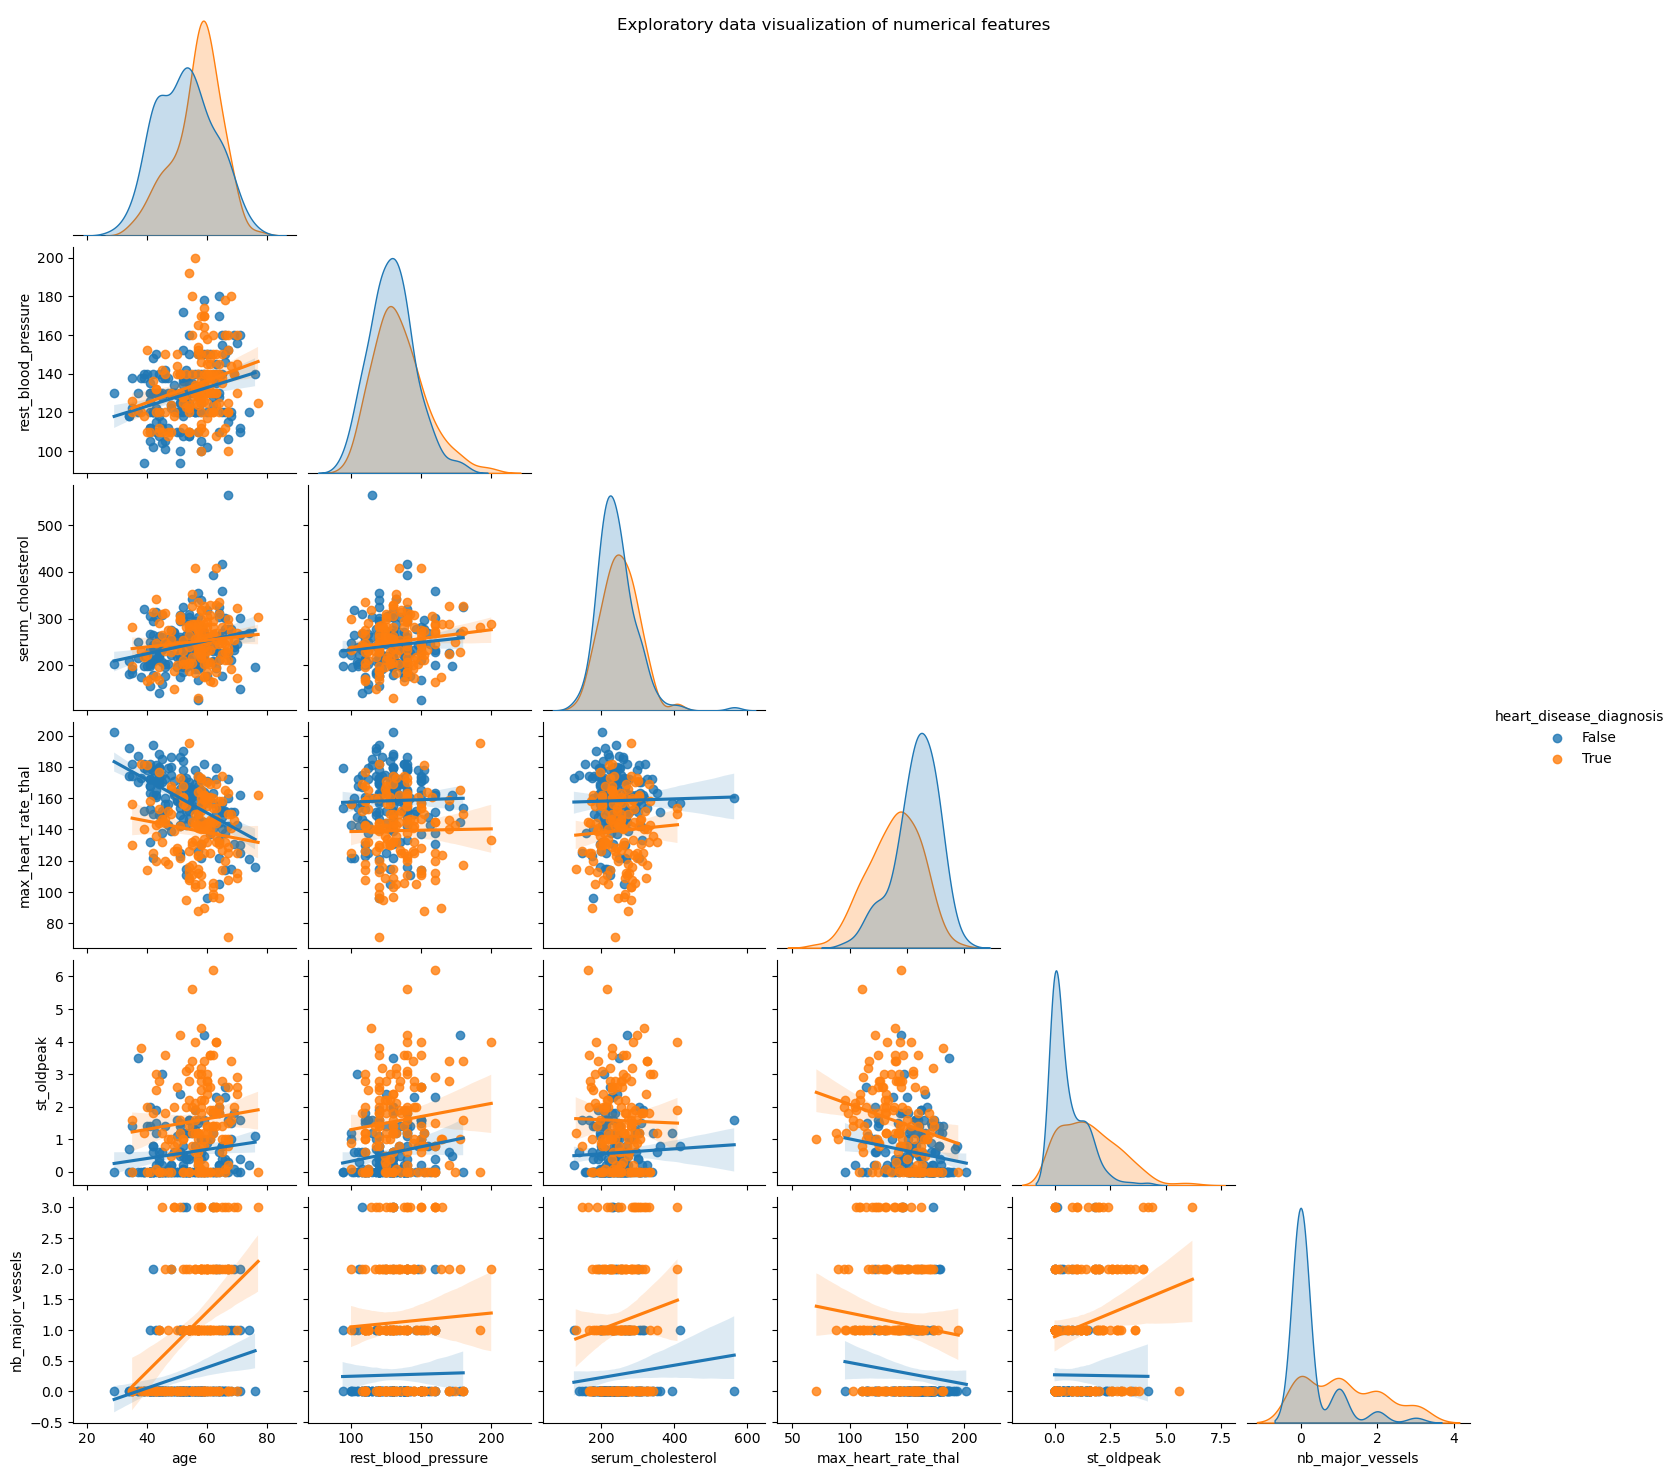

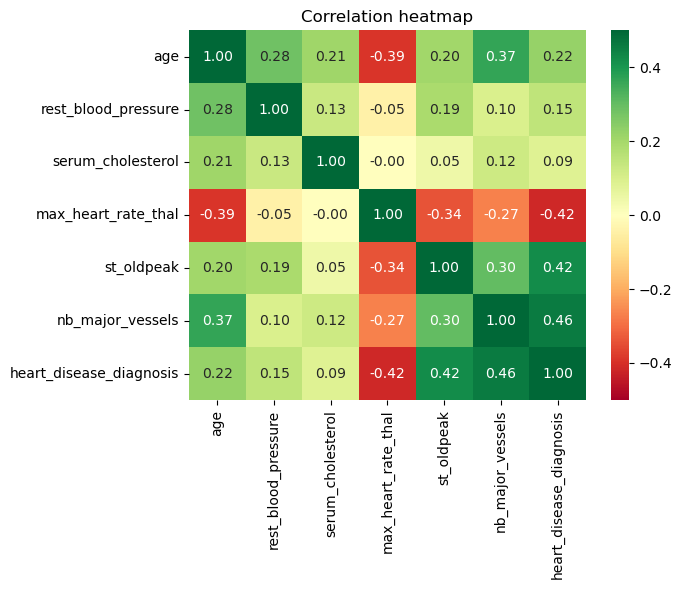

In [31]:
from src.plotting import look_for_correlations

look_for_correlations(df)

From the regression plot, we can observe that at a younger age (around 40), patients with heart disease have a lower max heart rate at the thallium stress test but later in life, after 60 years old, the difference is reducing and both groups perform similarly.
With age, the number of major vessels visible by fluoroscopy increases and more rapidly in the heart disease group. 

Moreover the st_old peak, the ST depression induced by exercise relative to rest, increases with the number of major vessels damaged in the heart disease group.  

In the heatmap, heart disease seems to negatively correlate with the maximum heart rate and seem to positively correlate with the nb of major vessels visible by fluoroscopy.

 

In [32]:
num_df = df.select_dtypes(include='number')
num_df.corr()

,age,rest_blood_pressure,serum_cholesterol,max_heart_rate_thal,st_oldpeak,nb_major_vessels
age,1.000000,0.284946,0.208950,-0.393806,0.203805,0.365323
rest_blood_pressure,0.284946,1.000000,0.130120,-0.045351,0.189171,0.097528
serum_cholesterol,0.208950,0.130120,1.000000,-0.003432,0.046564,0.123726
max_heart_rate_thal,-0.393806,-0.045351,-0.003432,1.000000,-0.343085,-0.265699
st_oldpeak,0.203805,0.189171,0.046564,-0.343085,1.000000,0.301067
nb_major_vessels,0.365323,0.097528,0.123726,-0.265699,0.301067,1.000000


In [33]:
correlation_df = df[['age', 'rest_blood_pressure', 'serum_cholesterol','max_heart_rate_thal', 'st_oldpeak', 'nb_major_vessels','heart_disease_diagnosis']]
corr_matrix = correlation_df.corr()
corr_matrix['heart_disease_diagnosis'].sort_values(ascending = False)

heart_disease_diagnosis    1.000000
nb_major_vessels           0.460033
st_oldpeak                 0.424510
age                        0.223120
rest_blood_pressure        0.150825
serum_cholesterol          0.085164
max_heart_rate_thal       -0.417167
Name: heart_disease_diagnosis, dtype: float64

### What's the distribution of chest_pain in disease vs healthy group?

In [34]:
from src.plotting import plot_pie_chart

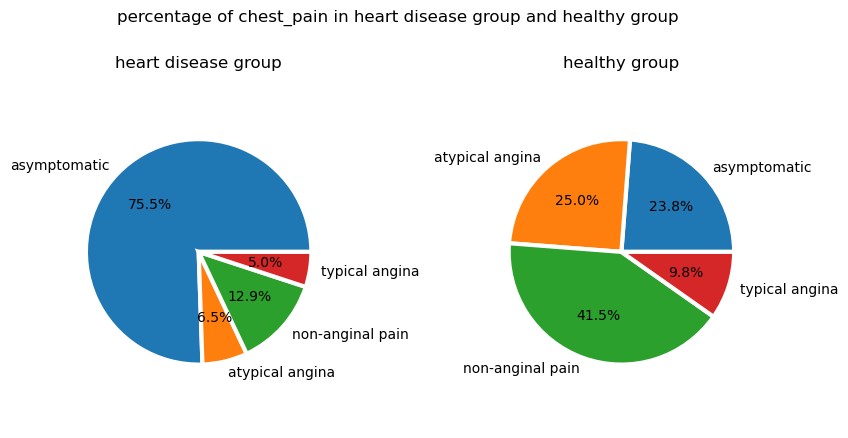

In [35]:
plot_pie_chart(df,'chest_pain')

Typical angina consists of chest pain, throat and arm, relieved by relaxing blood vessels with a spray.
Atypical angina is a type of pain around the chest but that does not follow the typical scheme.
Non-anginal pain is when the patient has chest pain from something else like lungs or gastric system. 
Asymptomatic means there are no symptoms.

In the heart disease group (left pie chart), we see that most of the patients have asymptomatic chest pain (75.5%) while in the healthy group, non-anginal pain seems to be dominating the chart (41.5%). This observation is surprising but we'll see later that another variable can be investigated for chest pain, 'exergice-angina'.

### What's the distribution of thallium_stress_test in disease vs healthy group?

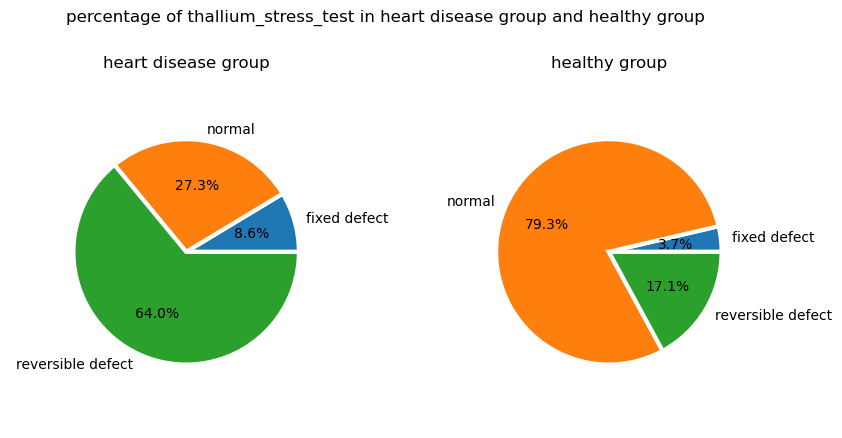

In [36]:
plot_pie_chart(df,'thallium_stress_test')

I looked at the results of thallium stress test, that shows the how well the blood flows.
'normal' means blood supply to all areas of the heart muscle and most patients of the healthy group have a normal blood flow while the the heart disease group has a higher proportion of reversible perfusion defect – meaning a decreased blood flow to an area of heart muscle, due to inadequate blood supply.
And a small proportion of Fixed perfusion defect – decreased blood flow to an area of heart muscle, due to permanently damaged muscle (essentially a scar in the heart muscle)


### What can we observe for ST slope?

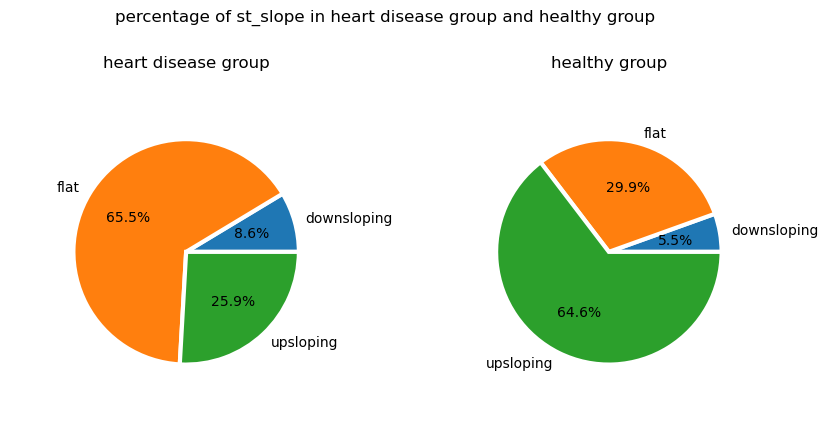

In [37]:
plot_pie_chart(df,'st_slope')

Flat, upsloping or downsloping is the shape of the slope of the the ST curve in the electrocardiogram and can be indicative of ischemia.

An electrocardiogram has in the x axis, the ms and in the y axis the millivolts. During exercise, the ST segment makes a depression and has a curvy shape, it becomes sharply upsloping. 
An abnormal ST segment response is horizontal (planar) or downsloping depression.

In this case, the pie charts allows to visualize the proportion of each category. We observe a higher frequency of a flat slope in the heart disease group. On the contrary, we observe 64.6% of patients show an upsloping compared to 25.9% in the heart disease group. 

### Is exercise-induced angina associated with heart disease?

We have seen that most of the patients with heart disease have asymptomatic symptoms for chest pain. So another way to check for chest pain is after an exercise. Which is called exercise induced angina.

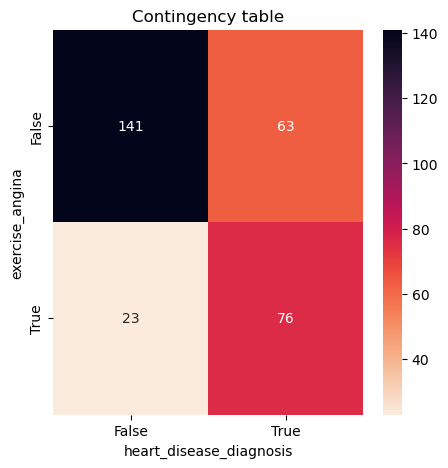

In [38]:
contingency_table(df, 'exercise_angina')

In [39]:
chi_square_stats(df, 'exercise_angina')

Chi2 statistics:  54.68643453080239
p-value:  1.413788096718085e-13
Degree of freedom:  1
Expected frequencies:  [[110.41584158  93.58415842]
 [ 53.58415842  45.41584158]]


We see that the two variables are not independent but there are surprisingly low numbers of patients with chest pain after exercise and having heart disease.

## Conclusion

To conclude, we saw that men are more affected by heart disease than women. We also saw that the heart disease group is characterized by a asymptomatic chest pain and a reversible defect at the thallium stress test, as well as a flat ST slope during exercise.
In this study, fasting blood sugar and heart disease seem to be independent, although it is known now that diabetes, which corresponds to a fasting blood sugar over 126mg/dl, is a risk factor for heart disease. Here an exact value of 'fasting_blood_sugar' would have been better to build a histogram distribution and appreciate the result.

Moreover, we shouldn’t forget that all these tests all have different sensitivity and specificity, which can greatly affect the observations. I observed that exercise-angina and heart disease are associated but there are still low numbr of patients with heart disease with angina during exercise in comparison to those who don't have angina and don't have heart disease. Looking at the original publication, it shows that the sensitivity for the test is at 55%, which is quite low and might explain a number of misdiagnosd patients for exercise-induced angina.
